### Unsupervised learning

1. Clustering
    * Kmeans
    * DBScan
2. Principal Component Analysis (PCA) 

3. Dimensionality Reduction


### Kmeans Clustering

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.cluster import KMeans
from sklearn import datasets

sns.set_style('darkgrid')
sns.set_palette('husl')

In [15]:
data = datasets.load_iris(as_frame=True)['data']

In [16]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
data.rename(columns={'sepal length (cm)':'sepal_length',
                     'sepal width (cm)': 'sepal_width',
                     'petal length (cm)':'petal_length',
                     'petal width (cm)':'petal_width'}, inplace = True)

In [18]:
px.scatter(data_frame= data, x = 'sepal_length', y ='petal_length')

In [24]:
model = KMeans(n_clusters=3, random_state= 23, n_init= 20)

model.fit(data)

predictions = model.predict(data)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [26]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'KMEAANS CLUSTERING WITH K = 3')

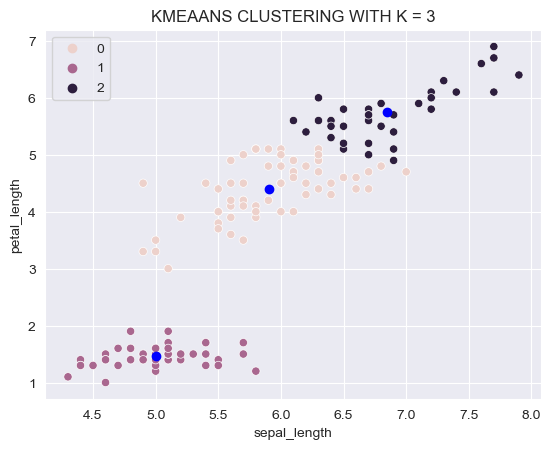

In [34]:
sns.scatterplot(data=data, x = 'sepal_length', 
                y = 'petal_length', hue = predictions)

centroid_x, centroid_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]

plt.plot(centroid_x, centroid_y, 'ob')

plt.title('KMEAANS CLUSTERING WITH K = 3')

In [30]:
# getting the centroid coordinates
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
model.inertia_

78.851441426146

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'KMEAANS CLUSTERING WITH K = 6')

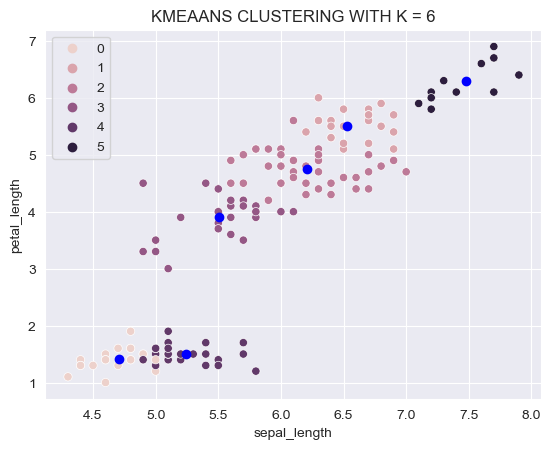

In [36]:
model2 = KMeans(n_clusters=6, random_state= 23, n_init= 10)

model2.fit(data)

preds = model2.predict(data)

sns.scatterplot(data=data, x = 'sepal_length', 
                y = 'petal_length', hue = preds)

centroid2_x, centroid2_y = model2.cluster_centers_[:,0], model2.cluster_centers_[:,2]

plt.plot(centroid2_x, centroid2_y, 'ob')

plt.title('KMEAANS CLUSTERING WITH K = 6')


In [37]:
model2.inertia_

39.03998724608726

### CHOOSING THE OPTIMAL K WITH ELBOW METHOD


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

Text(0, 0.5, 'value of inertia')

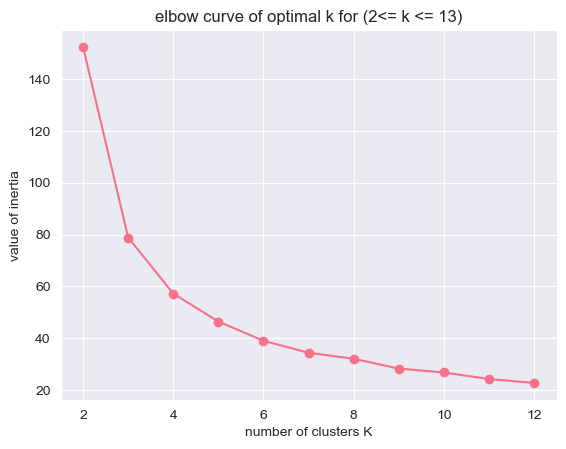

In [45]:
clusters = list(range(2,13))
inertia = []

for cluster in clusters:
    model = KMeans(n_clusters= cluster, random_state= 23, n_init=10).fit(data)
    inertia.append(model.inertia_)
    

plt.plot(clusters, inertia, 'o-')
plt.title('elbow curve of optimal k for (2<= k <= 13)')
plt.xlabel('number of clusters K')
plt.ylabel('value of inertia')

In [48]:
data['flower'] = ['rose' if x==0 else 'hibiscus' if x ==1
                  else 'sunflower' for x in predictions]

In [50]:
data['flower'].value_counts()

rose         62
hibiscus     50
sunflower    38
Name: flower, dtype: int64